In [477]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import csv

In [478]:
#ESSENTIAL VARIABLES

# set the coordinates in tuple form of the polygon

"""
COORDINATES = [(1,0), (2,0), (3,1), (3,2), (2,3), (1,3), (0,2), (0,1)] # octagon
COORDINATES = [(0,1), (1,0), (2,0), (3,1), (1.5,2)] # pentagon
COORDINATES = [(1,10), (3, 8),(0,2), (1,1), (2,0), (3,0), (4,1), (5,2), (4,3), (3,4), (2,4), (1,3), (2,5), (6,7), (8,12), (4,4), (9,9), (4,6), (12,5), (1,6), (2, 7), (8,2), (9,4), (7,6)] # random

with open('coordinates.csv', newline='') as f:
    reader = csv.reader(f)
    COORDINATES = list(reader)

for point in COORDINATES:
    point[0] = int(point[0])
    point[1] = int(point[1])
"""
COORDINATES = [(0,2), (1,1), (2,0), (3,0), (4,1), (5,2), (4,3), (3,4), (2,4), (1,3)] # decigon

# number of children a parent births per run
# usually use 500
BIRTH_SIZE = 500

# number of children required to have the fittest distance before the final distance is determined
# higher = more accurate, but takes much more time, especially past 200
# usually use 100
NUM_FITTEST_CHILDREN = 100

"""
max. number of mutations per child.
seems as though the higher the number of coordinates gets, the mutation number has a greater effect.
however, too high, and computation time takes too long.
too low, it's less accurate.
3 seems to be the sweet spot
at lower numbers, the mutations per child don't seem to matter
# usually use 1 for small, 3 for large
"""
MUTATIONS_PER_CHILD = 10

In [479]:
%%capture

# finds distance covered from index 0 to last index, moving left to right
# doesn't return to original index (full circle), stops at last index
def find_dist(coords):
    # get previous value to compute distance
    # here, prev is the first coordinate of the list, but later becomes the i-1 th coordinate
    prev = coords[0]
    
    # distance variable for summation
    dist = 0
    
    # iterate over coordinates, add distances between coordinates to total distance, repeat until done
    for i in range(1, len(coords)):
        # distance formula: sqrt((x change)^2 + (y change)^2)
        temp_dist = np.sqrt(( np.square(( prev[0] - coords[i][0] )) + np.square( prev[1] - coords[i][1] )))
        
        dist += temp_dist
        prev = coords[i]
        
    # return distance covered float
    return dist

# switch two coordinates at random in the list
def mutate(child, mutations):
    # create copy to prevent accidental modifications
    temp_child = child.copy()
    
    # create random indices to swap
    indices_list = []
    for i in range(mutations):
        indices_list.append([random.randint(1, len(temp_child) - 1), random.randint(1, len(temp_child) - 1)])
    
    # swap the two coordinates
    for indices in indices_list:
        temp_gene = temp_child[indices[0]]
        temp_child[indices[0]] = temp_child[indices[1]]
        temp_child[indices[1]] = temp_gene

    # return the list with the swapped coordinates
    return temp_child

# create size number of mutated children, based on the parent
def reproduce(parent, pop_size):
    children = []

    for i in range(pop_size):
        children.append(mutate(parent, MUTATIONS_PER_CHILD))
    
    return children
    
# choose best child from the population
def select(children):
    # find best performing child byu
    lowest = find_dist(children[0])
    fittest_child = children[0]
    
    for i in range(1, len(children) - 1):
        child_distance = find_dist(children[i])
        
        if child_distance < lowest:
            lowest = child_distance
            fittest_child = children[i]
            
    return fittest_child

In [480]:
# record time at beginning of execution
begin_time = time.time()

# shuffle the points, and insert the starting point into the beginning
# note: the starting point will never be "mutated," it will always remain at the first index
original_parent = COORDINATES[1:]
random.shuffle(original_parent)
original_parent.insert(0, COORDINATES[0])

# set the fittest parent equal to the original parent initially
fittest_child = original_parent

# set the last parent equal to the original parent initially
last_parent = fittest_child

parent_dist = 100000000
count = 0

# run until the "best" distance is found count times, to ensure the children really are close to the fittest
fittest_found = False
while not fittest_found:
    # create children based off the mother with a birth size of BIRTH_SIZE
    members = reproduce(last_parent, BIRTH_SIZE)
    
    # choose the fittest child, which becomes the parent of the next generation
    fittest_child = select(members)
    
    # find the distance traveled of the fittest child
    child_dist = find_dist(fittest_child)
    
    # if the child is fitter than the parent, replace the parent with the child
    if child_dist < parent_dist:
        # reset the number of children that had the same fittest distance
        count = 0
        print(f'\nNew fittest distance: {child_dist}')
        # replace parent with child
        parent_dist = child_dist
        last_parent = fittest_child
    
    # add one to the count if the child's fitness matches the parent
    elif child_dist == parent_dist:
        count += 1
        print(f'{count} equivalent')
        if count >= NUM_FITTEST_CHILDREN:
            fittest_found = True
end_time = time.time()
time_diff = end_time - begin_time


New fittest distance: 17.89681914012433

New fittest distance: 17.56296860470214

New fittest distance: 15.912687064829257

New fittest distance: 15.055199887160551

New fittest distance: 14.721349351738363

New fittest distance: 13.543203766865057

New fittest distance: 12.485281374238571
1 equivalent
2 equivalent
3 equivalent
4 equivalent
5 equivalent
6 equivalent
7 equivalent
8 equivalent
9 equivalent

New fittest distance: 11.899494936611667
1 equivalent
2 equivalent
3 equivalent
4 equivalent
5 equivalent
6 equivalent
7 equivalent
8 equivalent
9 equivalent
10 equivalent
11 equivalent
12 equivalent
13 equivalent
14 equivalent
15 equivalent
16 equivalent
17 equivalent
18 equivalent
19 equivalent
20 equivalent
21 equivalent
22 equivalent
23 equivalent
24 equivalent
25 equivalent
26 equivalent
27 equivalent
28 equivalent
29 equivalent
30 equivalent
31 equivalent
32 equivalent
33 equivalent
34 equivalent
35 equivalent
36 equivalent
37 equivalent
38 equivalent
39 equivalent
40 equivalen

Start Point:(0, 2)

GA's Best Sequence[(0, 2), (1, 3), (2, 4), (3, 4), (4, 3), (5, 2), (4, 1), (3, 0), (2, 0), (1, 1)]
GA's Best Distance: 11.899494936611667

Original Sequence[(0, 2), (3, 0), (3, 4), (2, 4), (1, 3), (2, 0), (1, 1), (5, 2), (4, 1), (4, 3)]
Original Distance: 22.13357524836932

Percent Improvement:46.23780928709944%

Execution Time: 103.03605580329895 seconds


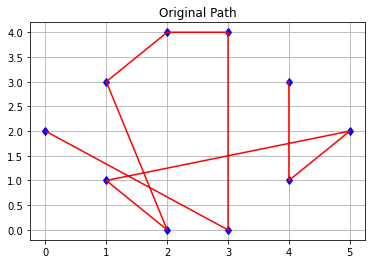

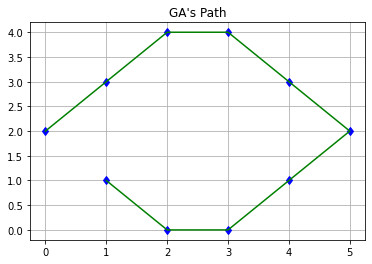

In [481]:
# OUTPUT FINAL DATA

# information about old sequence of coordinates, then GA's sequence
print("Start Point:" + str(original_parent[0]) + "\n")

print("GA's Best Sequence" + str(last_parent))
print("GA's Best Distance: " + str(find_dist(last_parent)) + "\n")

print("Original Sequence" + str(original_parent))
print("Original Distance: " + str(find_dist(original_parent)) + "\n")

pct_change = ( find_dist(original_parent) - find_dist(last_parent) )/ find_dist(original_parent) * 100
print("Percent Improvement:" + str(pct_change) + "%\n")

print("Execution Time: " + str(time_diff) + " seconds")
# charts of old sequence vs GA's sequence
x, y = np.array(original_parent).T
x_path, y_path = np.array(last_parent).T

plt.title("Original Path")
plt.plot(x, y, "bd")
plt.plot(x, y, "r")
plt.grid()
plt.show()

plt.title("GA's Path")
plt.plot(x_path, y_path, "bd")
plt.plot(x_path, y_path, "g")
plt.grid()
plt.show()